# sklearn

## k-means clustering


In [2]:
import numpy as np
import pandas as pd

# load data
iris_data = pd.read_csv('./dataset/iris/iris.csv')
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X, y = iris_data.iloc[:, :-1], iris_data.iloc[:, -1]
X, y = X.to_numpy(), y.to_numpy()

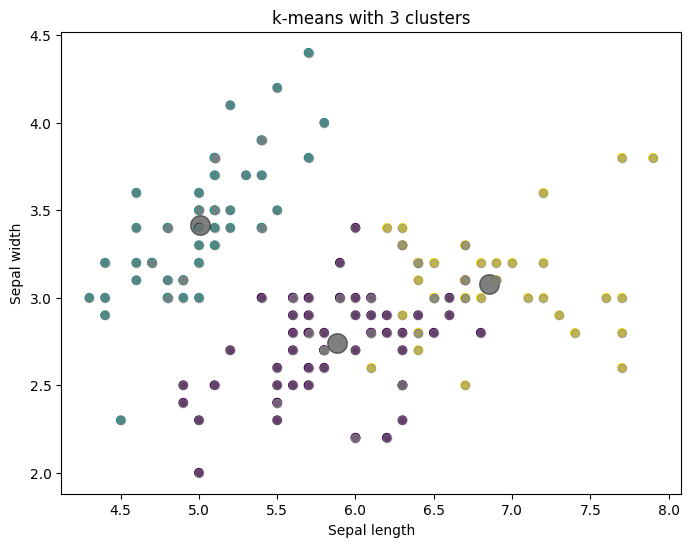

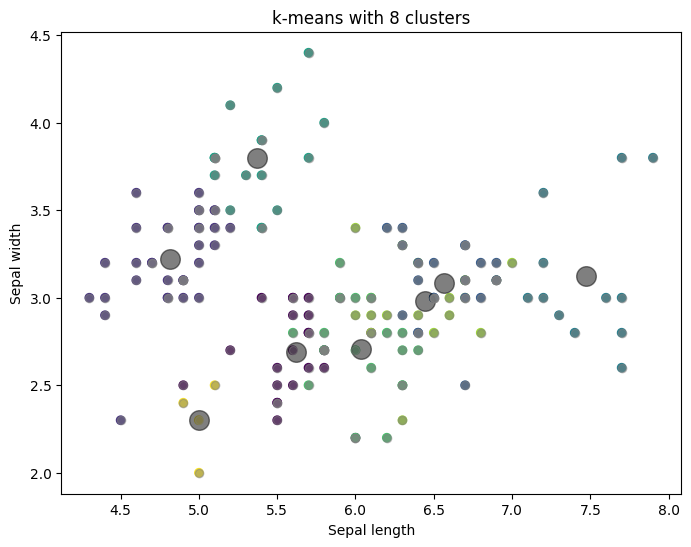

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# estimator of 3 clusters and 8 clusters
estimators = [
    ("k-means with 3 clusters", KMeans(n_clusters=3, random_state=0)),
    ("k-means with 8 clusters", KMeans(n_clusters=8, random_state=0)),
]

for title, est in estimators:
    # fit
    est.fit(X)
    labels = est.predict(X)
    # plot
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    centers = est.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)
    plt.title(title)
    # original data
    plt.scatter(X[:, 0], X[:, 1], c="gray", alpha=0.5)
    plt.show()

---------------------
calculate the accuracy of situation (n_clusters=3)

In [7]:
from sklearn.cluster import KMeans

y2int = y.copy()
y2int[y2int == "Iris-setosa"] = 1
y2int[y2int == "Iris-versicolor"] = 0
y2int[y2int == "Iris-virginica"] = 2
y2int = y2int.astype(int)

km = KMeans(n_clusters=3, random_state=0)
km.fit(X)
accuracy = np.mean(y2int == km.labels_)
print("k-means Accuracy:", f"{accuracy}")

k-means Accuracy: 0.8866666666666667


## DBSCAN


In [70]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=20)
labels = dbscan.fit_predict(X).astype(int)
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2]), array([29, 48, 58, 15]))

In [71]:
y2int = y.copy()
y2int[y == 'Iris-setosa'] = 0
y2int[y == 'Iris-versicolor'] = 1
y2int[y == 'Iris-virginica'] = -1

accuracy = np.mean(y2int == labels)
print("DBSCAN accuracy:", accuracy)

DBSCAN accuracy: 0.74


it's hard to find a best parameter for DBSCAN.

##  spectral clustering

article refer to <https://arxiv.org/pdf/0711.0189>

* practical issues

realise the practical issue from [scikit learn example](https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#sphx-glr-auto-examples-cluster-plot-segmentation-toy-py)

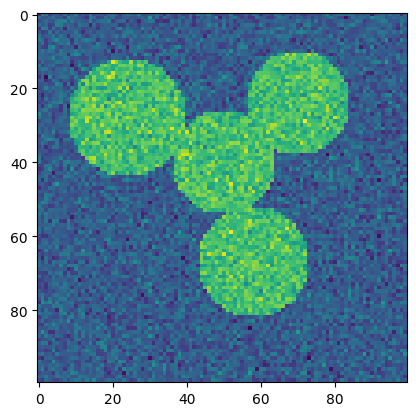

In [11]:
# generate img data
import numpy as np

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1**2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2**2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3**2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4**2 

# plotting 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)
img += 1 + 0.2 * np.random.randn(*img.shape)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

the Spectral clustering approach solves the problem know as **‘normalized graph cuts’**: the image is seen as a graph of connected voxels, and the spectral clustering algorithm amounts to choosing graph cuts defining regions while **minimizing the ratio of the gradient along the cut, and the volume of the region**.


In [38]:
# Convert the image into a graph with the value of the gradient on the edges.
# gradient of image is the direction of the steepest change in the image intensity.
from sklearn.feature_extraction import image

graph = image.img_to_graph(img, mask=mask)
# Graph of the pixel-to-pixel gradient connections.
# Edges are weighted with the gradient values.


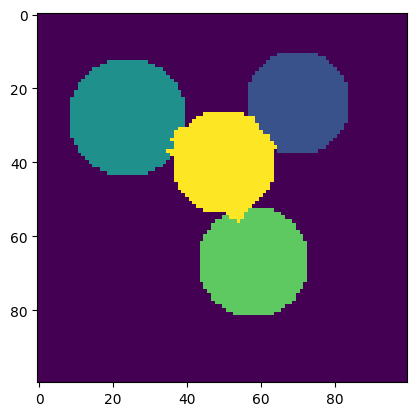

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=4) # the labels of clusters
label_im = np.full(mask.shape, -1.0) # initialize the label image with -1

label_im[mask] = labels # assign labels to pixels inside the mask
 
plt.figure()
plt.imshow(label_im)
plt.show()

## Gaussian mixtures

learn from [Exercises](https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb)

-------------------------
*Exercise: Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).*

In [2]:
from sklearn.datasets import fetch_olivetti_faces
import numpy

# get dataset
olivetti = fetch_olivetti_faces()

In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [4]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

/home/zqy/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


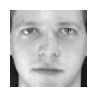

In [5]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(1, 1))
plt.imshow(olivetti.images[0], cmap="grey")
plt.axis("off")
plt.show()

In [6]:
from sklearn.mixture import GaussianMixture
import numpy as np

X = olivetti.data
y_true = olivetti.target

In [8]:
gmm = GaussianMixture(n_components=40, covariance_type='full', random_state=0)
gmm.fit(X)
y_pred = gmm.predict(X)

KeyboardInterrupt: 